# En este ultimo cuadernillo, me gustaria probar la manera en que estas tablas pueden ser cargadas en PowerBi (de forma directa e indirecta)
## Tambien me gustaria dejar mejor completado la biblioteca que se desarrollo en este curso, agregando un par de funciones adicionales que nos pudieron haber sido utiles (ya que en el cuadernillo anterior, quedo muy largo, se repetió mucho codigo)


## **Partamos viendo la forma de importar las tablas a un archivo de PowerBI (metodo directo)**

En la opcion para obtener datos, buscar la que puede conectarse con PostgreSQL.
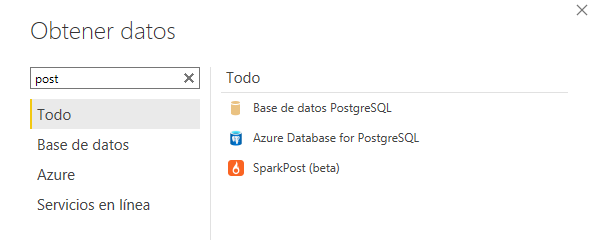

Rellenar los campos que aparecen en la pestaña. (**Nota: en servidor colocar localhost**)
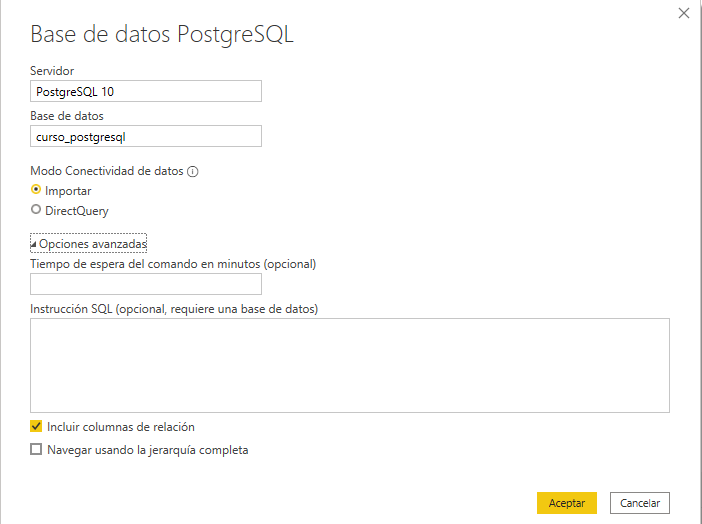

Para rellernar estos campos puede ser de utilidad abrir el administrador y buscar en esta parte.
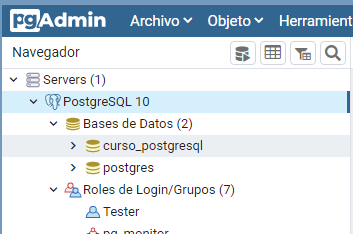

Este ahora nos pide el nombre de usuario y la contraseña (que son los parametros que hemos utilizado siempre para trabajar desde Python)
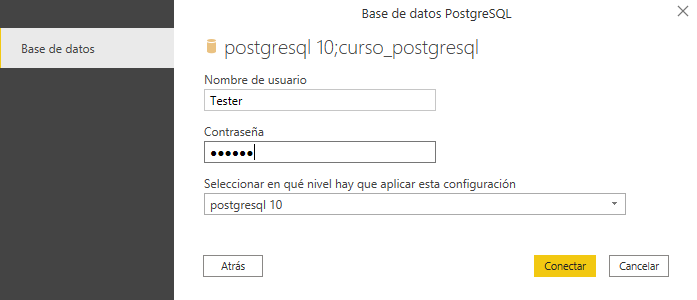

Ya luego nos apareceran las tablas que podemos importar (**nota: las vistas se encuentran incluidas en estas opciones**)
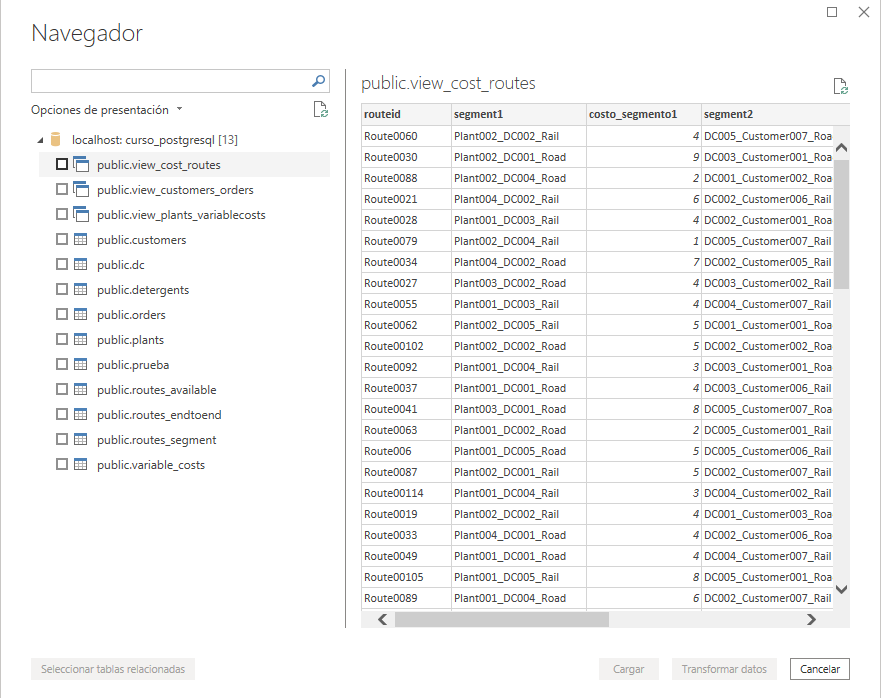

**Otro dato interesante de analizar es que, junto con importar las tablas, estas respetaron las condiciones de relacionas establecidas en el cuadernillo anterior**

Relacion entre clientes - ordenes
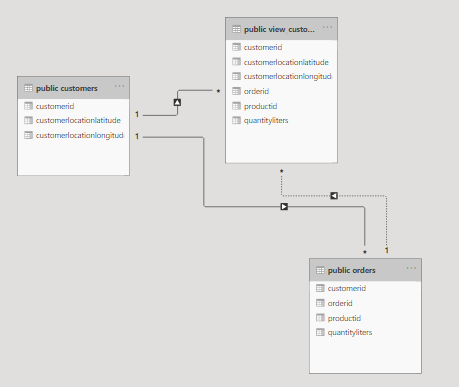

Relacion entre plantas - detergentes - costos variables
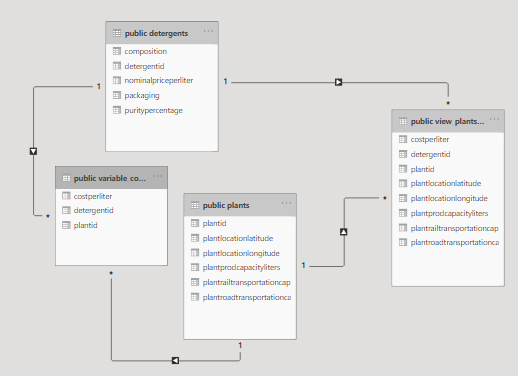

Relacion entre rutas - segmentos(2 veces) - segmentos directos (end_to_end)
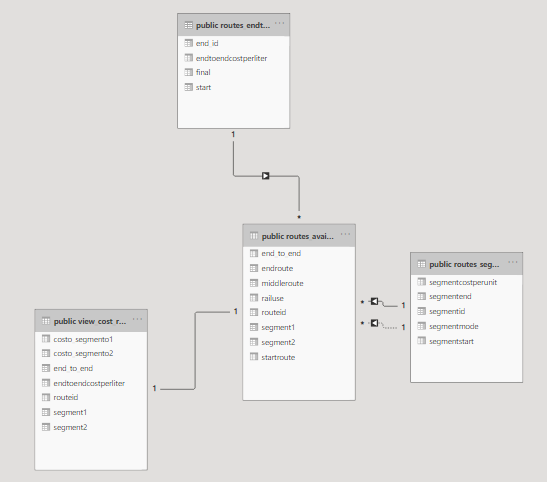


## **Continuemos a observar como se podrian importar los datos de manera indirecta, utilizando un Scrip de Python**

In [1]:
# La idea es utilizar un Script de Python generando los dataframes con el metodo para mostrar tablas
## antes de que se me olvide, tengo reservado un entorno virtual para PowerBI, por lo que debo instalar
## la biblioteca psycopg2

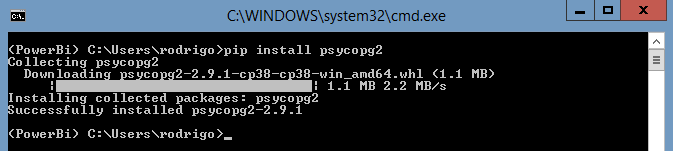


In [2]:
# Ahora si, probemos este script sencillo y ver si resulta
import pandas as pd
import psycopg2
from raaraya1 import SQL

usuario = SQL('curso_postgresql', 'Tester', '123456')

comando = 'select * from customers'
df = usuario.mostrar_tabla(comando)
df



,0,1,2
0,Customer001,-69.7415041,5.7217254
1,Customer002,-17.74631895,7.71807615
2,Customer003,67.41158818,79.0660602
3,Customer004,-71.91233417,-25.39319369
4,Customer005,68.44101913,-62.49004925
5,Customer006,-58.8784902,-22.07052049
6,Customer007,27.39095208,-49.38065519


## Ejecutarlo desde aqui no genera problema, pero distinto es la historia si trato de ejecutarlo desde PowerBI
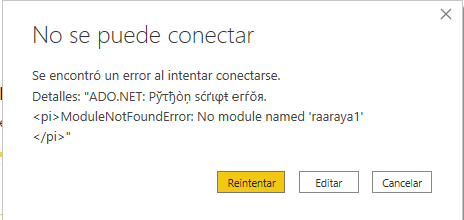

In [ ]:
# antes de buscar la manera que importar nuestra clase al entorno virtual, lo que quiero corroborar es que 
# sea factible de generar las tablas (voy a probar con el codigo entero)

import pandas as pd
import psycopg2

class SQL():
    def __init__(self, data_base, user, password):
        self.conexion = 'dbname={} user={} password={}'.format(data_base, user, password)

    def ejecutar(self, comando):
        conn = psycopg2.connect(self.conexion)
        cur = conn.cursor()
        cur.execute(comando)
        conn.commit()
        cur.close()
        conn.close()

    def mostrar_tabla(self, comando, nombre_tabla=False):
        if nombre_tabla == False:
            conn = psycopg2.connect(self.conexion)
            cur = conn.cursor()
            cur.execute(comando)
            rows = cur.fetchall()
            df = pd.DataFrame(rows)
            conn.commit()
            cur.close()
            conn.close()
            return df
        else:
            # nombre de las columnas
            conn = psycopg2.connect(self.conexion)
            cur = conn.cursor()
            comando1 = "SELECT (column_name, data_type) FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{}'".format(nombre_tabla)
            cur.execute(comando1)            
            columnas = cur.fetchall()            
            conn.commit()
            cur.close()
            conn.close()
            
            # para el resto de los datos
            conn = psycopg2.connect(self.conexion)
            cur = conn.cursor()
            cur.execute(comando)
            rows = cur.fetchall()
            df = pd.DataFrame(rows)
            conn.commit()
            cur.close()
            conn.close()
            return columnas, df 

usuario = SQL('curso_postgresql', 'Tester', '123456')

comando = 'select * from customers'
df = usuario.mostrar_tabla(comando)
df




## En esta ocación si obtuve los resultados esperados
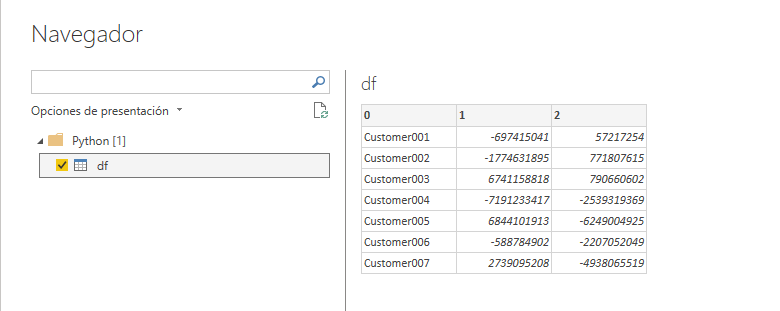

**Nota: Al importar los datos de esta manera, no se llegan a conservar las relaciones y el nombre de las tablas**

## Bien, la manera de poder utilizar esta clase (**y no tener que pegar el codigo entero antes**) es fijando una **variable de entorno**
Para esto dediquemos una ruta de acceso al archivo 'raaraya1.py' (por ejemplo el siguiente)
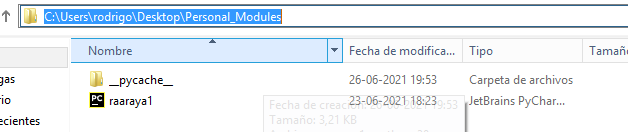

luego tenemos que abrir en 'panel de control' y buscar 'variables de entorno'
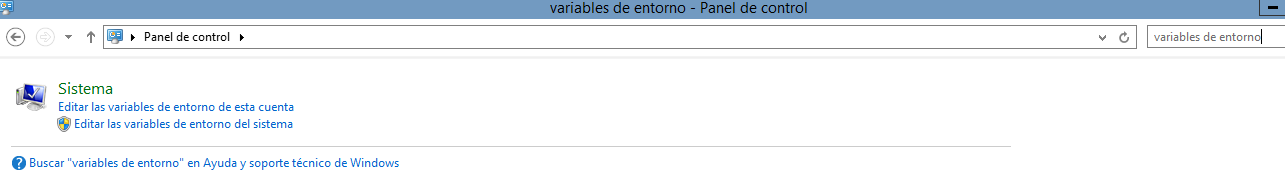

En 'editar variables de entorno' seleccionar crear una nueva
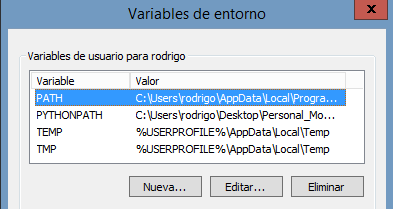

Nombrar a esta variable 'PYTHONPATH' (**todo en mayuscula**) y colocar la direccion de la carpeta que contiene al archivo ('C:\Users\rodrigo\Desktop\Personal_Modules' en mi caso)
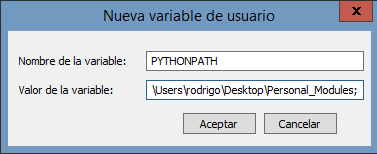

Dar aceptar a todo y listo. Con esto ya podemos utilizar esta clase como si se tratase de una biblioteca que hayamos instalado. (**nota: cualquier archivo que se coloque luego en esta carpeta, se puede llamar con el comando 'import'**)

## **Por ultimo desarrollemos las funciones adicionales que nos podrian haber servido de ayuda en el cuadernillo anterior**

In [1]:
# Algo que pude notar del cuadarno anterior es que perdia mucho tiempo analizando si una columna llegaba
# a ser buena candidata para actuar como primary key, y en particular este era un metodo bastante repetitivo
# y tedioso, por ello creo que puede ser importante generar y agregar esta funcion

# Conectar con base de datos
from raaraya1 import SQL
import pandas as pd
import psycopg2

usuario = SQL('curso_postgresql', 'Tester', '123456')




In [2]:
# Funcion para cambiar columna a primary key

# Antes de hacer la funcion, probemos un poco con una de las tablas que necesitaba correcciones 
## descarguemos la tabla que corregimos hace poco (la tabla routes_segments presentaba bastantes errores)
ruta = 'https://raw.githubusercontent.com/raaraya1/University-Projects/main/Logistics/Datos/routes_segment.csv'
archivo = pd.read_csv(ruta, sep=';')
df = pd.DataFrame(archivo)
df


,SegmentStart,SegmentEnd,SegmentMode,SegmentCostPerUnit
0,Plant001,DC001,Road,4
1,Plant002,DC002,Rail,4
2,Plant001,DC004,Road,6
3,Plant001,DC004,Rail,3
4,Plant002,DC002,Road,5
...,...,...,...,...
115,Plant002,Customer007,Road,9
116,Plant001,Customer002,Rail,1
117,Plant003,Customer002,Road,9
118,Plant004,Customer002,Rail,7


In [4]:
# voy a importar esta tabla
'''comando = 'drop table prueba_segment'
usuario.ejecutar(comando)
'''
nombre = 'prueba_segment'
usuario.importar(nombre, df)

In [5]:
# ahora voy a mostrar la tabla
comando = 'select * from prueba_segment'
columnas, df = usuario.mostrar_tabla(comando, 'prueba_segment')
print(columnas)
df
        

[('(segmentstart,"character varying")',), ('(segmentend,"character varying")',), ('(segmentmode,"character varying")',), ('(segmentcostperunit,"character varying")',)]


,0,1,2,3
0,Plant001,DC001,Road,4
1,Plant002,DC002,Rail,4
2,Plant001,DC004,Road,6
3,Plant001,DC004,Rail,3
4,Plant002,DC002,Road,5
...,...,...,...,...
115,Plant002,Customer007,Road,9
116,Plant001,Customer002,Rail,1
117,Plant003,Customer002,Road,9
118,Plant004,Customer002,Rail,7


In [6]:
# recordemos las condiciones y los errores que presentaba esta tabla
## 1) Ausencia de una columna que funcione como indicador
## 2) Al generar la columna identificadora, esta presentaba valores duplicados

### - lo primero que será necesario es dejar la opcion para la generacion de una columna adicional 
### - luego dar la opcion para especificar que columnas comprondran las filas de esta nueva columna

# tipos de argumentos que podrian ser necesarios
nombre_tabla = 'prueba_segment'
nombre_columna = 'segment_id'
num_columna = 4
columna_adicional = False 
columnas_generadoras = [0, 1, 2]

# para agreagar la columna adicional
if columna_adicional == True:
    columna_nueva = []
    #num_col_generadoras = len(columnas_generadoras)
    
    for i in range(len(df)):
        columna_nueva.append('')
        
        for j in columnas_generadoras:            
            columna_nueva[i] += df[j][i] + '_'
        columna_nueva[i] = columna_nueva[i][:-1]
    #print(columna_nueva)
# en caso contrario se asigna a columna_nueva la columna que se quiere verificar
else:
    columna_nueva = list(df[num_columna][:])
            
# verificar condicion de valores duplicados
num_col_nueva = len(columna_nueva)
conjunto = set(columna_nueva) 
num_conj_nueva = len(conjunto)
if num_col_nueva == num_conj_nueva:
    print('sin valores duplicados')
else:
    duplicados = num_col_nueva - num_conj_nueva
    print('existen {} valores duplicados'.format(duplicados))

# caso 1 -> no existen valores duplicados y columna adicional
if columna_adicional == True and duplicados == 0:
    usuario.agregar_columna(nombre_tabla, 'columna_nueva', columna_nueva)
    comando = 'alter table {} add primary key (columna_nueva)'.format(nombre_tabla)
    usuario.ejecutar(comando)
# caso 2 -> no existen valores duplicados y sin columna adicional
elif columna_adicional == False and duplicados == 0:
    comando = 'alter table {} add primary key ({})'.format(nombre_tabla, nombre_columna)
    usuario.ejecutar(comando)

# caso 3 -> existen valores duplicados y columna adicional
if columna_adicional == True and duplicados > 0:
    # generar la columna indice 
    comando = 'alter table {} add column indice serial'.format(nombre_tabla)
    usuario.ejecutar(comando)
                
    indices =  range(len(df))
    diccionario = {}
    for ind in indices:
        diccionario[columna_nueva[ind]] = indices[ind]
    indices_dic = list(diccionario.values())
    ind_duplicados = [valor for valor in indices]
    for ind in indices_dic:
        ind_duplicados.remove(ind)
    # corregir la posicion
    ind_duplicados = [i+1 for i in ind_duplicados]
    print(ind_duplicados)    
    
    # para eliminarlas ejecutamos el siguiente comando
    for ind in ind_duplicados:
        comando_base = 'delete from {} where indice = {}'.format(nombre_tabla, ind)
        usuario.ejecutar(comando_base)
    
    # recordamos eliminar la columna indice
    comando = 'alter table {} drop column indice'.format(nombre_tabla)
    usuario.ejecutar(comando)

    # volvemos a generar la nueva columna (pero ahora corregida)
    comando = 'select * from {}'.format(nombre_tabla)
    df = usuario.mostrar_tabla(comando)
        
    # restablecemos la columna nueva
    columna_nueva = []
    for i in range(len(df)):
        columna_nueva.append('')
        
        for j in columnas_generadoras:            
            columna_nueva[i] += df[j][i] + '_'
        columna_nueva[i] = columna_nueva[i][:-1]
        
    # verificar condicion de valores duplicados
    num_col_nueva = len(columna_nueva)
    conjunto = set(columna_nueva) 
    num_conj_nueva = len(conjunto)
    if num_col_nueva == num_conj_nueva:
        # añadimos la columna
        usuario.agregar_columna(nombre_tabla, nombre_columna, columna_nueva)
        comando = 'alter table {} add primary key ({})'.format(nombre_tabla, nombre_columna)
        usuario.ejecutar(comando)

        print('sin valores duplicados -> columna añadida')     
        
    else:
        duplicados = num_col_nueva - num_conj_nueva
        print('existen {} valores duplicados'.format(duplicados))

# caso 4 -> existen valores duplicados y sin columna adicional
elif columna_adicional == False and duplicados > 0:
    ## buscar los valores repetidos
    indices =  range(len(df))
    diccionario = {}
    for ind in indices:
        diccionario[columna_nueva[ind]] = indices[ind]
    indices_dic = list(diccionario.values())
    ind_duplicados = [valor for valor in indices]
    for ind in indices_dic:
        ind_duplicados.remove(ind)
    ind_duplicados = [i+1 for i in ind_duplicados]
            
    ## añadir la columna indice
    comando = 'alter table {} add column indice serial'.format(nombre_tabla)
    usuario.ejecutar(comando)
        
    ## retirar las filas que calzan con la de los valores repetidos
    for ind in ind_duplicados:
        comando_base = 'delete from {} where indice = {}'.format(nombre_tabla, ind)
        usuario.ejecutar(comando_base)    
    
    ## verificar que ya no existan valores duplicados
    comando = 'select * from {}'.format(nombre_tabla)
    df = usuario.mostrar_tabla(comando)
    
    columna_nueva = []
    for i in range(len(df)):
        columna_nueva.append('')
        
        for j in columnas_generadoras:            
            columna_nueva[i] += df[j][i] + '_'
        columna_nueva[i] = columna_nueva[i][:-1]
        
    num_col_nueva = len(columna_nueva)
    conjunto = set(columna_nueva) 
    num_conj_nueva = len(conjunto)
    if num_col_nueva == num_conj_nueva:
        ## asignar la columna como primary key    
        comando = 'alter table {} add primary key ({})'.format(nombre_tabla, nombre_columna)
        usuario.ejecutar(comando)
        print('sin valores duplicados -> columna añadida')
    else:
        duplicados = num_col_nueva - num_conj_nueva
        print('existen {} valores duplicados'.format(duplicados))
    
    ## eliminar la columna indice
    comando = 'alter table {} drop column indice'.format(nombre_tabla)
    usuario.ejecutar(comando)



existen 8 valores duplicados
[90, 91, 95, 99, 107, 109, 111, 113]
sin valores duplicados -> columna añadida


In [15]:
comando = 'select * from prueba_segment'
columnas, df = usuario.mostrar_tabla(comando, 'prueba_segment')
print(columnas)
df


[('(segmentstart,"character varying")',), ('(segmentend,"character varying")',), ('(segmentmode,"character varying")',), ('(segmentcostperunit,"character varying")',)]


,0,1,2,3
0,Plant001,DC001,Road,4
1,Plant002,DC002,Rail,4
2,Plant001,DC004,Road,6
3,Plant001,DC004,Rail,3
4,Plant002,DC002,Road,5
...,...,...,...,...
115,Plant002,Customer007,Road,9
116,Plant001,Customer002,Rail,1
117,Plant003,Customer002,Road,9
118,Plant004,Customer002,Rail,7


In [13]:
# Bien, el codigo anterior me parece que esta correcto (aunque muy largo igual, repito mucho codigo)
## corregijamos un poco esto

def valores_duplicados(columna_nueva):
    num_col_nueva = len(columna_nueva)
    conjunto = set(columna_nueva) 
    num_conj_nueva = len(conjunto)
    duplicados = num_col_nueva - num_conj_nueva
    return duplicados

def dic_duplicados(df, columna_nueva):
    indices =  range(len(df))
    diccionario = {}
    for ind in indices:
        diccionario[columna_nueva[ind]] = indices[ind]
    indices_dic = list(diccionario.values())
    ind_duplicados = [valor for valor in indices]
    for ind in indices_dic:
        ind_duplicados.remove(ind)
    # corregir la posicion
    ind_duplicados = [i+1 for i in ind_duplicados]
    return ind_duplicados

def generar_columna(df, columnas_generadoras):
    columna_nueva = []
    for i in range(len(df)):
        columna_nueva.append('')
        for j in columnas_generadoras:            
            columna_nueva[i] += df[j][i] + '_'
        columna_nueva[i] = columna_nueva[i][:-1]
    return columna_nueva

# Bien, ahora reescribamos todo
## PARAMETROS
nombre_tabla = 'prueba_segment'
nombre_columna = 'segment_id'
num_columna = 4
columna_adicional = True 
columnas_generadoras = [0, 1, 2]

def primary_key(nombre_tabla, nombre_columna, num_columna, columna_adicional=False, columnas_generadoras=[]):
    # generar dataframe
    comando = 'select * from {}'.format(nombre_tabla)
    df = usuario.mostrar_tabla(comando)
    
    # generar columna para verificar
    if columna_adicional == True:
        columna_nueva = generar_columna(df, columnas_generadoras)
    # en caso contrario se asigna a columna_nueva la columna que se quiere verificar
    else:
        columna_nueva = list(df[num_columna][:])
    
    # calcular cantidad de duplicados de la nueva columna
    duplicados = valores_duplicados(columna_nueva)
    
    # caso 1 -> no existen valores duplicados y columna adicional
    if columna_adicional == True and duplicados == 0:
        usuario.agregar_columna(nombre_tabla, 'columna_nueva', columna_nueva)
        comando = 'alter table {} add primary key (columna_nueva)'.format(nombre_tabla)
        usuario.ejecutar(comando)
        
    # caso 2 -> no existen valores duplicados y sin columna adicional
    elif columna_adicional == False and duplicados == 0:
        comando = 'alter table {} add primary key ({})'.format(nombre_tabla, nombre_columna)
        usuario.ejecutar(comando)
        
    # caso 3 -> existen valores duplicados y columna adicional
    if columna_adicional == True and duplicados > 0:
        # generar la columna indice 
        comando = 'alter table {} add column indice serial'.format(nombre_tabla)
        usuario.ejecutar(comando)

        # indice de las filas que hay que eliminar
        ind_duplicados = dic_duplicados(df, columna_nueva)
        
        # para eliminarlas ejecutamos el siguiente comando
        for ind in ind_duplicados:
            comando_base = 'delete from {} where indice = {}'.format(nombre_tabla, ind)
            usuario.ejecutar(comando_base)

        # recordamos eliminar la columna indice
        comando = 'alter table {} drop column indice'.format(nombre_tabla)
        usuario.ejecutar(comando)

        # volvemos a generar la nueva columna (pero ahora corregida)
        comando = 'select * from {}'.format(nombre_tabla)
        df = usuario.mostrar_tabla(comando)

        # restablecemos la columna nueva
        columna_nueva = generar_columna(df, columnas_generadoras)

        # verificar condicion de valores duplicados
        duplicados = valores_duplicados(columna_nueva)
        if duplicados == 0:
            usuario.agregar_columna(nombre_tabla, nombre_columna, columna_nueva)
            comando = 'alter table {} add primary key ({})'.format(nombre_tabla, nombre_columna)
            usuario.ejecutar(comando)
        
    # caso 4 -> existen valores duplicados y sin columna adicional
    elif columna_adicional == False and duplicados > 0:
        # indice de las filas que hay que eliminar
        ind_duplicados = dic_duplicados(df, columna_nueva)
        
        # añadir la columna indice
        comando = 'alter table {} add column indice serial'.format(nombre_tabla)
        usuario.ejecutar(comando)

        # retirar las filas que calzan con la de los valores repetidos
        for ind in ind_duplicados:
            comando_base = 'delete from {} where indice = {}'.format(nombre_tabla, ind)
            usuario.ejecutar(comando_base)    

        # volvemos a generar la nueva columna (pero ahora corregida)
        comando = 'select * from {}'.format(nombre_tabla)
        df = usuario.mostrar_tabla(comando)

        # restablecemos la columna nueva
        columna_nueva = generar_columna(df, columnas_generadoras)
        
        # verificar condicion de valores duplicados
        duplicados = valores_duplicados(columna_nueva)
        if duplicados == 0:
            comando = 'alter table {} add primary key ({})'.format(nombre_tabla, nombre_columna)
            usuario.ejecutar(comando)
        
        ## eliminar la columna indice
        comando = 'alter table {} drop column indice'.format(nombre_tabla)
        usuario.ejecutar(comando)       
    



In [17]:
primary_key(nombre_tabla, nombre_columna, num_columna, columna_adicional=True, columnas_generadoras=columnas_generadoras)
comando = 'select * from prueba_segment'
columnas, df = usuario.mostrar_tabla(comando, 'prueba_segment')
print(columnas)
df

[('(segmentstart,"character varying")',), ('(segmentend,"character varying")',), ('(segmentmode,"character varying")',), ('(segmentcostperunit,"character varying")',), ('(segment_id,"character varying")',)]


,0,1,2,3,4
0,Plant001,DC001,Road,4,Plant001_DC001_Road
1,Plant002,DC002,Rail,4,Plant002_DC002_Rail
2,Plant001,DC004,Road,6,Plant001_DC004_Road
3,Plant001,DC004,Rail,3,Plant001_DC004_Rail
4,Plant002,DC002,Road,5,Plant002_DC002_Road
...,...,...,...,...,...
107,Plant002,Customer003,Road,6,Plant002_Customer003_Road
108,Plant001,Customer005,Road,10,Plant001_Customer005_Road
109,Plant001,Customer006,Road,9,Plant001_Customer006_Road
110,Plant002,Customer007,Road,9,Plant002_Customer007_Road


## Bien, creo que esta  funcionando correctamente, asi que la añadiré a la biblioteca

In [6]:
# Antes de pasar a la siguiente, probemos ejecutarlo desde la biblioteca
## PARAMETROS
nombre_tabla = 'prueba_segment'
nombre_columna = 'segment_id'
num_columna = 4
columna_adicional = True 
columnas_generadoras = [0, 1, 2]

# ejecutamos desde biblioteca
usuario.primary_key(nombre_tabla, nombre_columna, num_columna, columna_adicional=True, columnas_generadoras=columnas_generadoras)

comando = 'select * from prueba_segment'
columnas, df = usuario.mostrar_tabla(comando, 'prueba_segment')
print(columnas)
df

[('(segmentstart,"character varying")',), ('(segmentend,"character varying")',), ('(segmentmode,"character varying")',), ('(segmentcostperunit,"character varying")',), ('(segment_id,"character varying")',)]


,0,1,2,3,4
0,Plant001,DC001,Road,4,Plant001_DC001_Road
1,Plant002,DC002,Rail,4,Plant002_DC002_Rail
2,Plant001,DC004,Road,6,Plant001_DC004_Road
3,Plant001,DC004,Rail,3,Plant001_DC004_Rail
4,Plant002,DC002,Road,5,Plant002_DC002_Road
...,...,...,...,...,...
107,Plant002,Customer003,Road,6,Plant002_Customer003_Road
108,Plant001,Customer005,Road,10,Plant001_Customer005_Road
109,Plant001,Customer006,Road,9,Plant001_Customer006_Road
110,Plant002,Customer007,Road,9,Plant002_Customer007_Road


## Por ultimo, añadir la siguiente funcion que tambien se utilizo bastante en el cuadernillo anterior.


In [7]:
def foreign_key(tabla1, columna1, tabla2, columna2):
    comando = '''alter table {} 
                 add constraint FK{} 
                 foreign key({}) 
                 references {} ({})'''.format(tabla1, columna1 + '_' + columna2 ,columna1, tabla2, columna2)

    usuario.ejecutar(comando)


## Otra cosa **importande de recordar** es que al igual que en cualquier biblioteca podemos usar **el icono ?** para consultar por su contenido. 

In [14]:
# ejemplo
SQL?

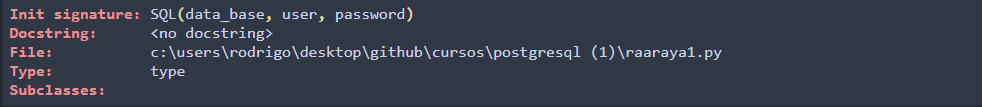

In [16]:
# mas en especifico
SQL??

**Esto para recorrer todo el modulo (sirve para recordar el nombre de las funciones y los argumentos que necesitan)**
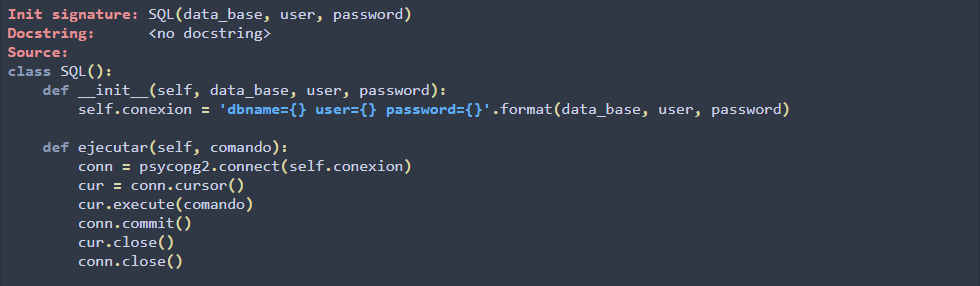

## Adicionales (Errores)

Error al cargar los datos a PowerBI.
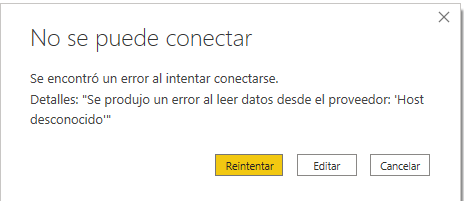

solucion:
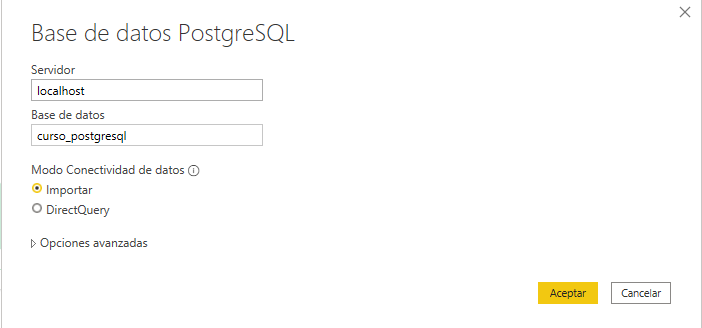
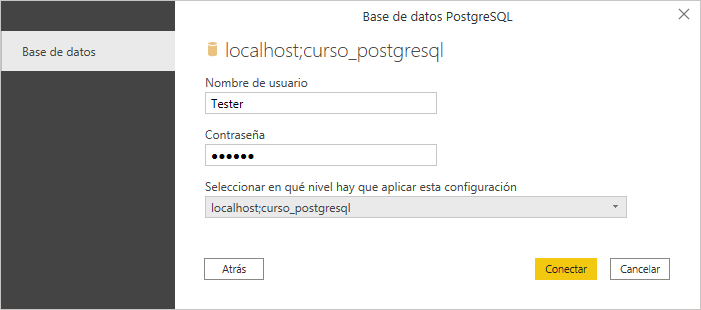
